# **Número de Condición**


In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Ejercicio 1

En este ejercicio vamos a probar o refutar algunas propiedades sobre el numero de condicion.
En cada item tendremos un propiedad que puede ser verdadera o falsa.
 - En caso de ser verdadera: dar su demostracion.
 - En caso de ser falsa: utilizar numpy para dar un contraejemplo.

Utilizar el comando `np.linalg.cond`.

**(a)** $Cond_2(A)$ + $Cond_2(B)$ = $Cond_2(A+B)$

In [9]:
A = np.array([[1, 0], [0, 2]])
B = np.array([[2, 0], [0, 1]])

cond2_A = np.linalg.cond(A, 2)
cond2_B = np.linalg.cond(B, 2)
cond2_A_plus_B = np.linalg.cond(A + B, 2)

print(f"Cond2(A) = {cond2_A}")
print(f"Cond2(B) = {cond2_B}")
print(f"Cond2(A+B) = {cond2_A_plus_B}")
print(f"Cond2(A) + Cond2(B) = {cond2_A + cond2_B}")


Cond2(A) = 2.0
Cond2(B) = 2.0
Cond2(A+B) = 1.0
Cond2(A) + Cond2(B) = 4.0


**(b)** $Cond_1(A)$ - $Cond_1(B)$ = $Cond_2(A-B)$

In [10]:
# Usamos las mismas A y B
cond1_A = np.linalg.cond(A, 1)
cond1_B = np.linalg.cond(B, 1)
cond2_A_minus_B = np.linalg.cond(A - B, 2)

print(f"Cond1(A) = {cond1_A}")
print(f"Cond1(B) = {cond1_B}")
print(f"Cond2(A-B) = {cond2_A_minus_B}")
print(f"Cond1(A) - Cond1(B) = {cond1_A - cond1_B}")

Cond1(A) = 2.0
Cond1(B) = 2.0
Cond2(A-B) = 1.0
Cond1(A) - Cond1(B) = 0.0


**(c)** $Cond_2(A)$ * $Cond_2(B)$ = $Cond_2(A.B)$

In [11]:
cond2_AB = np.linalg.cond(A @ B, 2)
producto_conds = cond2_A * cond2_B

print(f"Cond2(A) * Cond2(B) = {cond2_A} * {cond2_B} = {producto_conds}")
print(f"Cond2(A@B) = {cond2_AB}")
print(f"¿Son iguales? {np.isclose(producto_conds, cond2_AB)}")

Cond2(A) * Cond2(B) = 2.0 * 2.0 = 4.0
Cond2(A@B) = 1.0
¿Son iguales? False


## Ejercicio 2

El objetivo de este ejercicio es estudiar el número de condición de
algunas matrices a medida que su tamaño aumenta.



**(a)** Programar funciones que, dado $n \in \mathbb{N}$, devuelvan las siguientes matrices de $\mathbb{R}^{n\times n}$. La función que define $B_n$ ya viene dada.


\begin{equation*}
A_n=
\begin{pmatrix}
\frac{1}{n} & 0 & 0 & \cdots  & n^2\\
0 & \frac{1}{n} & 0 & \cdots & 0 \\
0 & 0 & \frac{1}{n} & \cdots & 0\\
\vdots & \vdots & \vdots  & \ddots & \vdots\\
1 & 0 & 0 & \cdots &  \frac{1}{n}\\
\end{pmatrix}
\qquad
B_n=
\begin{pmatrix}
4 & 1 & 0 & \cdots & 0 & 0\\
1 & 4 & 1 & \cdots & 0 & 0 \\
0 & 1 & 4 & \ddots &  & \vdots\\
\vdots & \vdots & \ddots & \ddots & \ddots & \vdots \\
0 & 0 &  & \ddots & 4 & 1\\
0 & 0 & \cdots & \cdots & 1 & 4 \\
\end{pmatrix}
\qquad
H_n=
\begin{pmatrix}
1 & \frac{1}{2} & \frac{1}{3} & \cdots  & \frac{1}{n}\\
\frac{1}{2} & \frac{1}{3} & \frac{1}{4} & \cdots & \frac{1}{n+1} \\
\frac{1}{3} & \frac{1}{4} & \frac{1}{5} & \cdots & \frac{1}{n+2}\\
\vdots & \vdots & \vdots  & \ddots & \vdots\\
\frac{1}{n} & \frac{1}{n+1} & \frac{1}{n+2} & \cdots &  \frac{1}{2n-1}\\
\end{pmatrix}
\end{equation*}



**Sugerencia:** Utilizar la función `np.diag` que recibe un array de números y genera una matriz diagonal con elementos dados por el array. (La usamos la semana pasada)




In [2]:
def matriz_B(n):
  B = np.eye(n, k=-1) + 4*np.eye(n, k=0) + np.eye(n, k=1)
  return B

In [17]:
def matriz_A(n):
    A = (1/n) * np.eye(n)
    A[0, n-1] = n**2
    A[n-1, 0] = 1
    return A

def matriz_B(n):
  B = np.eye(n, k=-1) + 4*np.eye(n, k=0) + np.eye(n, k=1)
  return B

def matriz_H(n):
    
    H = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            H[i, j] = 1 / (i + j + 1)
    
    return H

# Ejemplo para n=4
print("\nMatriz H_4:")
print(matriz_H(4))


Matriz H_4:
[[1.         0.5        0.33333333 0.25      ]
 [0.5        0.33333333 0.25       0.2       ]
 [0.33333333 0.25       0.2        0.16666667]
 [0.25       0.2        0.16666667 0.14285714]]


**(b)** Graficar para 100 vectores **unitarios** (en norma 2), $v\in\mathbb{R^2}$, $\; A_2v,\ B_2v,\ H_2v$

Para calcular la norma se puede usar: numpy.linalg.norm()

In [38]:
V=np.random.rand(2, 100) - 0.5 #El comando np.random.rand toma de argumento unas dimensiones y hace una matriz de ese tamaño con números random entre 0 y 1
print(V[:,0])

[-0.41089606  0.28710681]


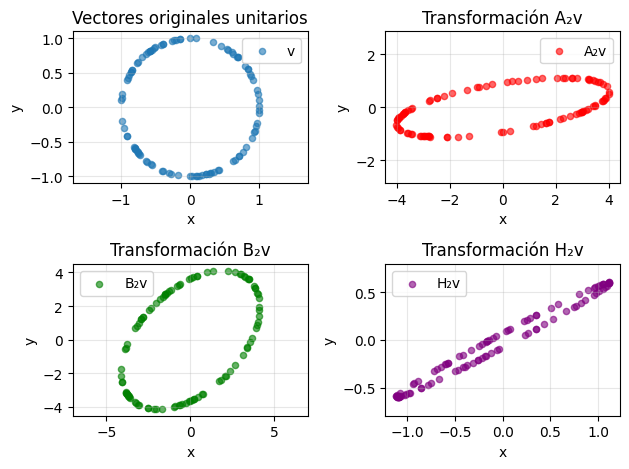

In [40]:
n = 2


A2 = matriz_A(n)
B2 = matriz_B(n)
H2 = matriz_H(n) 

V = np.random.rand(n, 100) - 0.5 


normas = np.linalg.norm(V, axis=0)
V = V / normas[None,:]


AV = A2 @ V
BV = B2 @ V  
HV = H2 @ V


fig, axes = plt.subplots(2, 2)


axes[0,0].scatter(V[0], V[1], alpha=0.6, s=20, label="v")
axes[0,0].set_title('Vectores originales unitarios')
axes[0,0].set_xlabel('x')
axes[0,0].set_ylabel('y')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].legend()
axes[0,0].axis('equal')

axes[0,1].scatter(AV[0], AV[1], alpha=0.6, s=20, label="A₂v", color='red')
axes[0,1].set_title('Transformación A₂v')
axes[0,1].set_xlabel('x')
axes[0,1].set_ylabel('y')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].legend()
axes[0,1].axis('equal')

axes[1,0].scatter(BV[0], BV[1], alpha=0.6, s=20, label="B₂v", color='green')
axes[1,0].set_title('Transformación B₂v')
axes[1,0].set_xlabel('x')
axes[1,0].set_ylabel('y')
axes[1,0].grid(True, alpha=0.3)
axes[1,0].legend()
axes[1,0].axis('equal')

axes[1,1].scatter(HV[0], HV[1], alpha=0.6, s=20, label="H₂v", color='purple')
axes[1,1].set_title('Transformación H₂v')
axes[1,1].set_xlabel('x')
axes[1,1].set_ylabel('y')
axes[1,1].grid(True, alpha=0.3)
axes[1,1].legend()
axes[1,1].axis('equal')

plt.tight_layout()
plt.show()



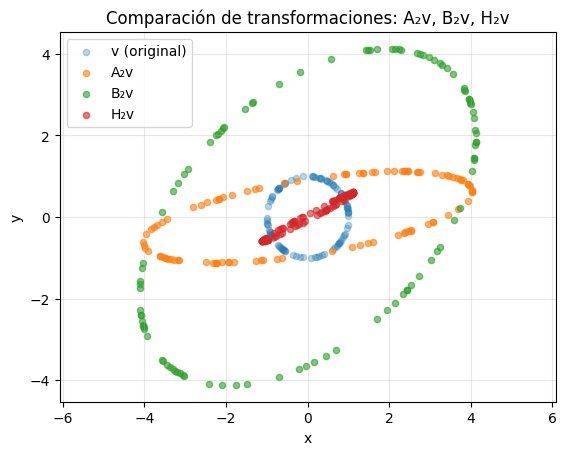

In [ ]:

plt.scatter(V[0], V[1], alpha=0.3, s=20, label="v (original)")
plt.scatter(AV[0], AV[1], alpha=0.6, s=20, label="A₂v")
plt.scatter(BV[0], BV[1], alpha=0.6, s=20, label="B₂v") 
plt.scatter(HV[0], HV[1], alpha=0.6, s=20, label="H₂v")
plt.title('Comparación de transformaciones: A₂v, B₂v, H₂v')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, alpha=0.3)
plt.legend()
plt.axis('equal')
plt.show()

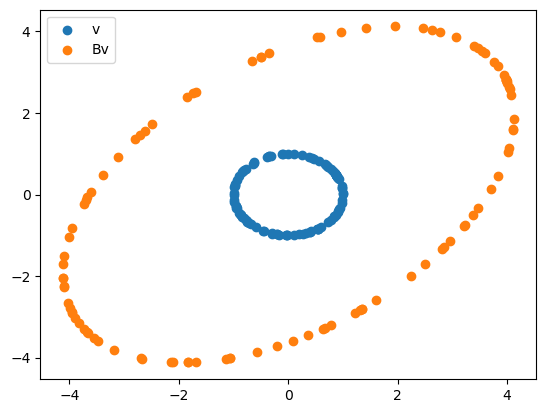

In [4]:
B = matriz_B(2)
V = np.random.rand(2, 100) - 0.5
for i in range(100):
    V[:,i]=V[:,i]/np.linalg.norm(V[:,i])

#Version vectorial para normalizar
#normas = np.linal.norm(V,axis=0)
#V = V / normas[None,:]

BV = np.dot(B,V)

plt.scatter(V[0], V[1], label = "v")
plt.scatter(BV[0], BV[1], label = "Bv")
plt.legend()

# Comando para  armar la matriz Hn (Matriz de Hilbert)
# ¡Ojo! Hay que importar el paquete scipy :
# scipy.linalg.hilbert(n) #  <--- Devuelve un array de n por n con entrada h[i,j] = 1 / (i+j+1) 


**(c)** Programar una función que, dada una matriz $M_n$ y un número natural $N$, guarde en un vector el valor de $Cond_2(M_n)$ para $1\leq n \leq N$.

In [5]:
def vector_condicion(M,N):
  #M es una función que calcula la matriz para cualquier tamaño n  
  #COMPLETAR
  #...
    v = np.array([])
    for n in range(N):
        v=np.append(v,np.linalg.cond(M(n)))
  return()

**(d)** Realizar gráficos del número de condición en norma 2 de las matrices definidas arriba para $N=10$.


In [6]:
x= #COMPLETAR
y= #COMPLETAR

plt.plot(x, y)
plt.show()

SyntaxError: invalid syntax (3426146991.py, line 1)

**Sugerencia:** Si es necesario, utilizar una escala logarítmica en el eje $y$.

**(e)** Repetir el ítem (d) para la matriz de Hilbert con $N=50$. ¿Cómo se explica el comportamiento observado?

In [ ]:
#COMPLETAR

**(Extra)** Programar una función que estime el número de condición 2 de una matrtiz,usando vectores aleatorios y la definición para las normas matriciales

In [ ]:
#COMPLETAR

## Ejercicio 3

Sea
$A=\left(
\begin{array}{ccc}
3&0 & 0\\
0& \frac 54 & \frac 34\\
0& \frac 34 & \frac 54\\
\end{array}
\right).$



In [ ]:
A = np.array([[3.0, 0, 0], [0, 5/4, 3/4], [0, 3/4, 5/4]])

(a) Calcular $Cond_\infty(A)$.


In [ ]:
#COMPLETAR condA=...

(b) ¿Cuán chico debe ser el error relativo en los datos, $\frac{\|b-\tilde{b}\|}{\|b\|}$, si se desea que el error relativo en la aproximación de la solución, $\frac{\|x-\tilde{x}\|}{\|x\|}, $ sea menor que $10^{-4}$ (en $\|\cdot\|_{\infty}$)? (Usar las cotas del ejercicio 4 de la práctica 4)



In [ ]:
#COMPLETAR

(c) Realizar experimentos numéricos para verificar las estimaciones del ítem anterior. Considerar $b=(3,2,2)^t$, que se corresponde con la solución exacta $x=(1,1,1)^t$. Generar vectores de error aleatorios, normalizarlos para que su norma sea tan chica como la estimada en el item anterior y perturbar $b$ obteniendo $\tilde{b}$. Finalmente, resolver $A\tilde{x}=\tilde{b}$ y verificar que $\|\tilde{x}-x\|<10^{-4}$.

In [ ]:
#COMPLETAR

## **Descomposición LU**


**(a)** Programar una función que triangule una matriz hasta llevarla a una triangular superior (asumir que no hay pivoteo)

In [3]:
def triangular_superior(A, tol: float = 1e-12) -> np.ndarray:
    """
    Devuelve una copia triangular superior de A usando eliminación gaussiana
    sin pivoteo. A puede ser rectangular.

    Parámetros
    ----------
    A : np.ndarray (n x m)
    tol : tolerancia para considerar un pivote como cero

    Retorna
    -------
    U : np.ndarray (n x m), triangular superior
    """
    U = np.array(A, dtype=float, copy=True)
    n, m = U.shape

    for k in range(min(n, m)):
        pivote = U[k, k]
        if abs(pivote) <= tol:
            raise np.linalg.LinAlgError(
                f"Pivot nulo o casi nulo en k={k}: U[{k},{k}]={pivote}. "
                "Sin pivoteo no se puede continuar."
            )
        # factores para anular por debajo del pivote:
        # Completar
        # eliminación vectorizada en el bloque a la derecha del pivote:
        # Completar
        # limpieza exacta de la columna por debajo del pivote:
        # Completar

    return U





**(b)** Modificar la función anterior para poder calcular L y U

In [ ]:
def lu_sin_pivoteo(A, tol: float = 1e-12) -> tuple[np.ndarray, np.ndarray]:
    """
    Descomposición LU sin pivoteo.
    Requiere A cuadrada y pivotes no nulos.

    Parámetros
    ----------
    A : np.darray (n x n)
    tol : tolerancia para pivotes casi nulos

    Retorna
    -------
    L, U : np.ndarray, np.ndarray tales que A = L @ U
           L es triangular inferior con diagonal de 1
           U es triangular superior
    """
    A = np.array(A, dtype=float, copy=False)
    n, m = A.shape
    if n != m:
        raise ValueError("A debe ser cuadrada para la descomposición LU.")

    L = np.eye(n, dtype=float)
    U = np.zeros_like(A)

    for i in range(n):
        # Fila i de U (vectorizado):
        # Completar
        if abs(U[i, i]) <= tol:
            raise np.linalg.LinAlgError(
                f"Pivot nulo o casi nulo en U[{i},{i}]={U[i,i]}. "
                "Sin pivoteo no se puede continuar."
            )

        # Columna i de L por debajo de la diagonal:
        # Completar

    return L, U